# The curse of dimensionality #
Welcome to this notebook. In this notebook the curse of dimensionality is demonstrated (see: https://www.datacamp.com/blog/curse-of-dimensionality-machine-learning). Intuitively you would say: "The more data, the better". This is not always true. Below a case is given where we add noise data to our fish data set. <br>
At the end a small assignment is given.


In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/bbozon/DataScience/refs/heads/main/Fish.csv'
#
# origin: https://documentation.sas.com/doc/en/statug/15.2/statug_sashelp_sect012.htm
# For each of the seven species (bream, roach, whitefish, parkki, perch, pike, and smelt),
# the weight, length, height, and width of each fish are tallied.
# Three different length measurements are recorded: from the nose of the fish to the beginning
# of its tail, from the nose to the notch of its tail, and from the nose to the end of its tail.
#
df = pd.read_csv(url)
df.head()
import numpy as np
np.random.seed(42)
df['noise1'] = np.random.normal(5,5,df.shape[0])
df['noise2'] = np.random.normal(30,5,df.shape[0])
df.head()


,Category,Species,Weight,Height,Width,Length1,Length2,Length3,noise1,noise2
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0,7.483571,33.282768
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2,4.308678,25.126592
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1,8.238443,33.935423
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5,12.615149,35.792978
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0,3.829233,25.896588


We will make a function which automaticly tests different models...

In [2]:
def test_model (model,X,y, ax= None):
    from sklearn.model_selection import train_test_split
    # we always want to work with a training, validation and test data set
    X_train, X_valid_plus_test, y_train, y_valid_plus_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_test, X_validation, y_test,y_validation = train_test_split(X_valid_plus_test, y_valid_plus_test, test_size=0.9, random_state=42)

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_temp = scaler.transform(X_train)                                              # scaling the train data set
    X_train = pd.DataFrame(X_temp, columns=X_train.columns)
    X_temp = scaler.transform(X_validation)                                              # scaling the test data set
    X_validation = pd.DataFrame(X_temp, columns=X_validation.columns)
    X_temp = scaler.transform(X_test)                                              # scaling the test data set
    X_test = pd.DataFrame(X_temp, columns=X_test.columns)
    # print (X_train.head)
    model.fit(X_train, y_train)                                                     # train the model
    pred = model.predict(X_validation)
    from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
    import matplotlib.pyplot as plt

    ConfusionMatrixDisplay.from_predictions(y_validation, pred, ax=ax)
    acc=accuracy_score(y_validation, pred)
    print ('accuracy is :',acc)
    return acc


Let's apply a k-NN model on the data set with the added noise.

accuracy is : 0.5172413793103449


0.5172413793103449

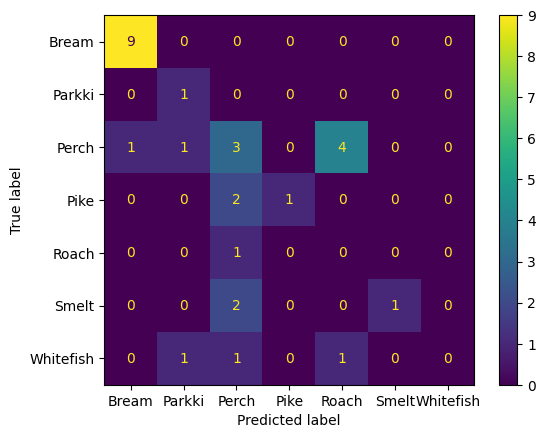

In [3]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
X=df.drop(['Category','Species','Length1','Width','Length2','Length3'],axis=1)
y=df['Species']
test_model(model,X,y)

And now without the noise (we drop the noise1 and noise2).

accuracy is : 0.7586206896551724


0.7586206896551724

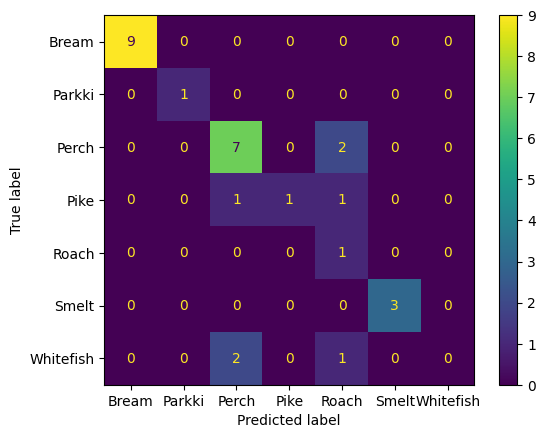

In [4]:
X=df.drop(['Category','Species','Length1','Width','Length2','Length3','noise1','noise2'],axis=1)
y=df['Species']
test_model(model,X,y)

When we compare the confusion matrices we see that the model with the added noise is significantly worse!

accuracy is : 0.6551724137931034


0.6551724137931034

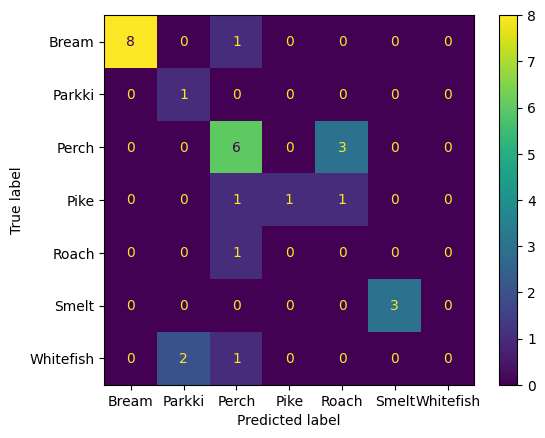

In [5]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
X=df.drop(['Category','Species','Length1','Width','Length2','Length3'],axis=1)   # we only want to use Weight and Height as features, drop the rest
y=df['Species']                                                                 # we want to predict the species of the fish
test_model(model,X,y)

accuracy is : 0.6896551724137931


0.6896551724137931

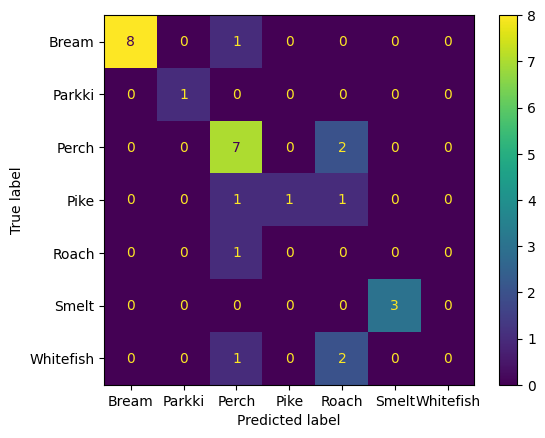

In [6]:
X=df.drop(['Category','Species','Length1','Width','Length2','Length3','noise1','noise2'],axis=1)   # we only want to use Weight and Height as features, drop the rest
y=df['Species']                                                                 # we want to predict the species of the fish
test_model(model,X,y)

We see that the impact on a decision tree is much less (which we expected), but still present!

1. Investigate the performance of random forest and SVM in the same manner.



Model is : KNeighborsClassifier(n_neighbors=1)

Features are : ['Category', 'Weight', 'Height', 'Width', 'Length1', 'Length2', 'Length3', 'noise1', 'noise2']
accuracy is : 0.9655172413793104

Features are : ['Category', 'Weight', 'Height', 'Width', 'Length1', 'Length2', 'Length3']
accuracy is : 1.0

Features are : ['Weight', 'Height', 'noise1', 'noise2']
accuracy is : 0.5172413793103449

Features are : ['Weight', 'Height']
accuracy is : 0.7586206896551724

Features are : ['Weight', 'Height']
accuracy is : 0.7586206896551724


Model is : DecisionTreeClassifier(random_state=42)

Features are : ['Category', 'Weight', 'Height', 'Width', 'Length1', 'Length2', 'Length3', 'noise1', 'noise2']
accuracy is : 1.0

Features are : ['Category', 'Weight', 'Height', 'Width', 'Length1', 'Length2', 'Length3']
accuracy is : 1.0

Features are : ['Weight', 'Height', 'noise1', 'noise2']
accuracy is : 0.6896551724137931

Features are : ['Weight', 'Height']
accuracy is : 0.6896551724137931

Features are : [

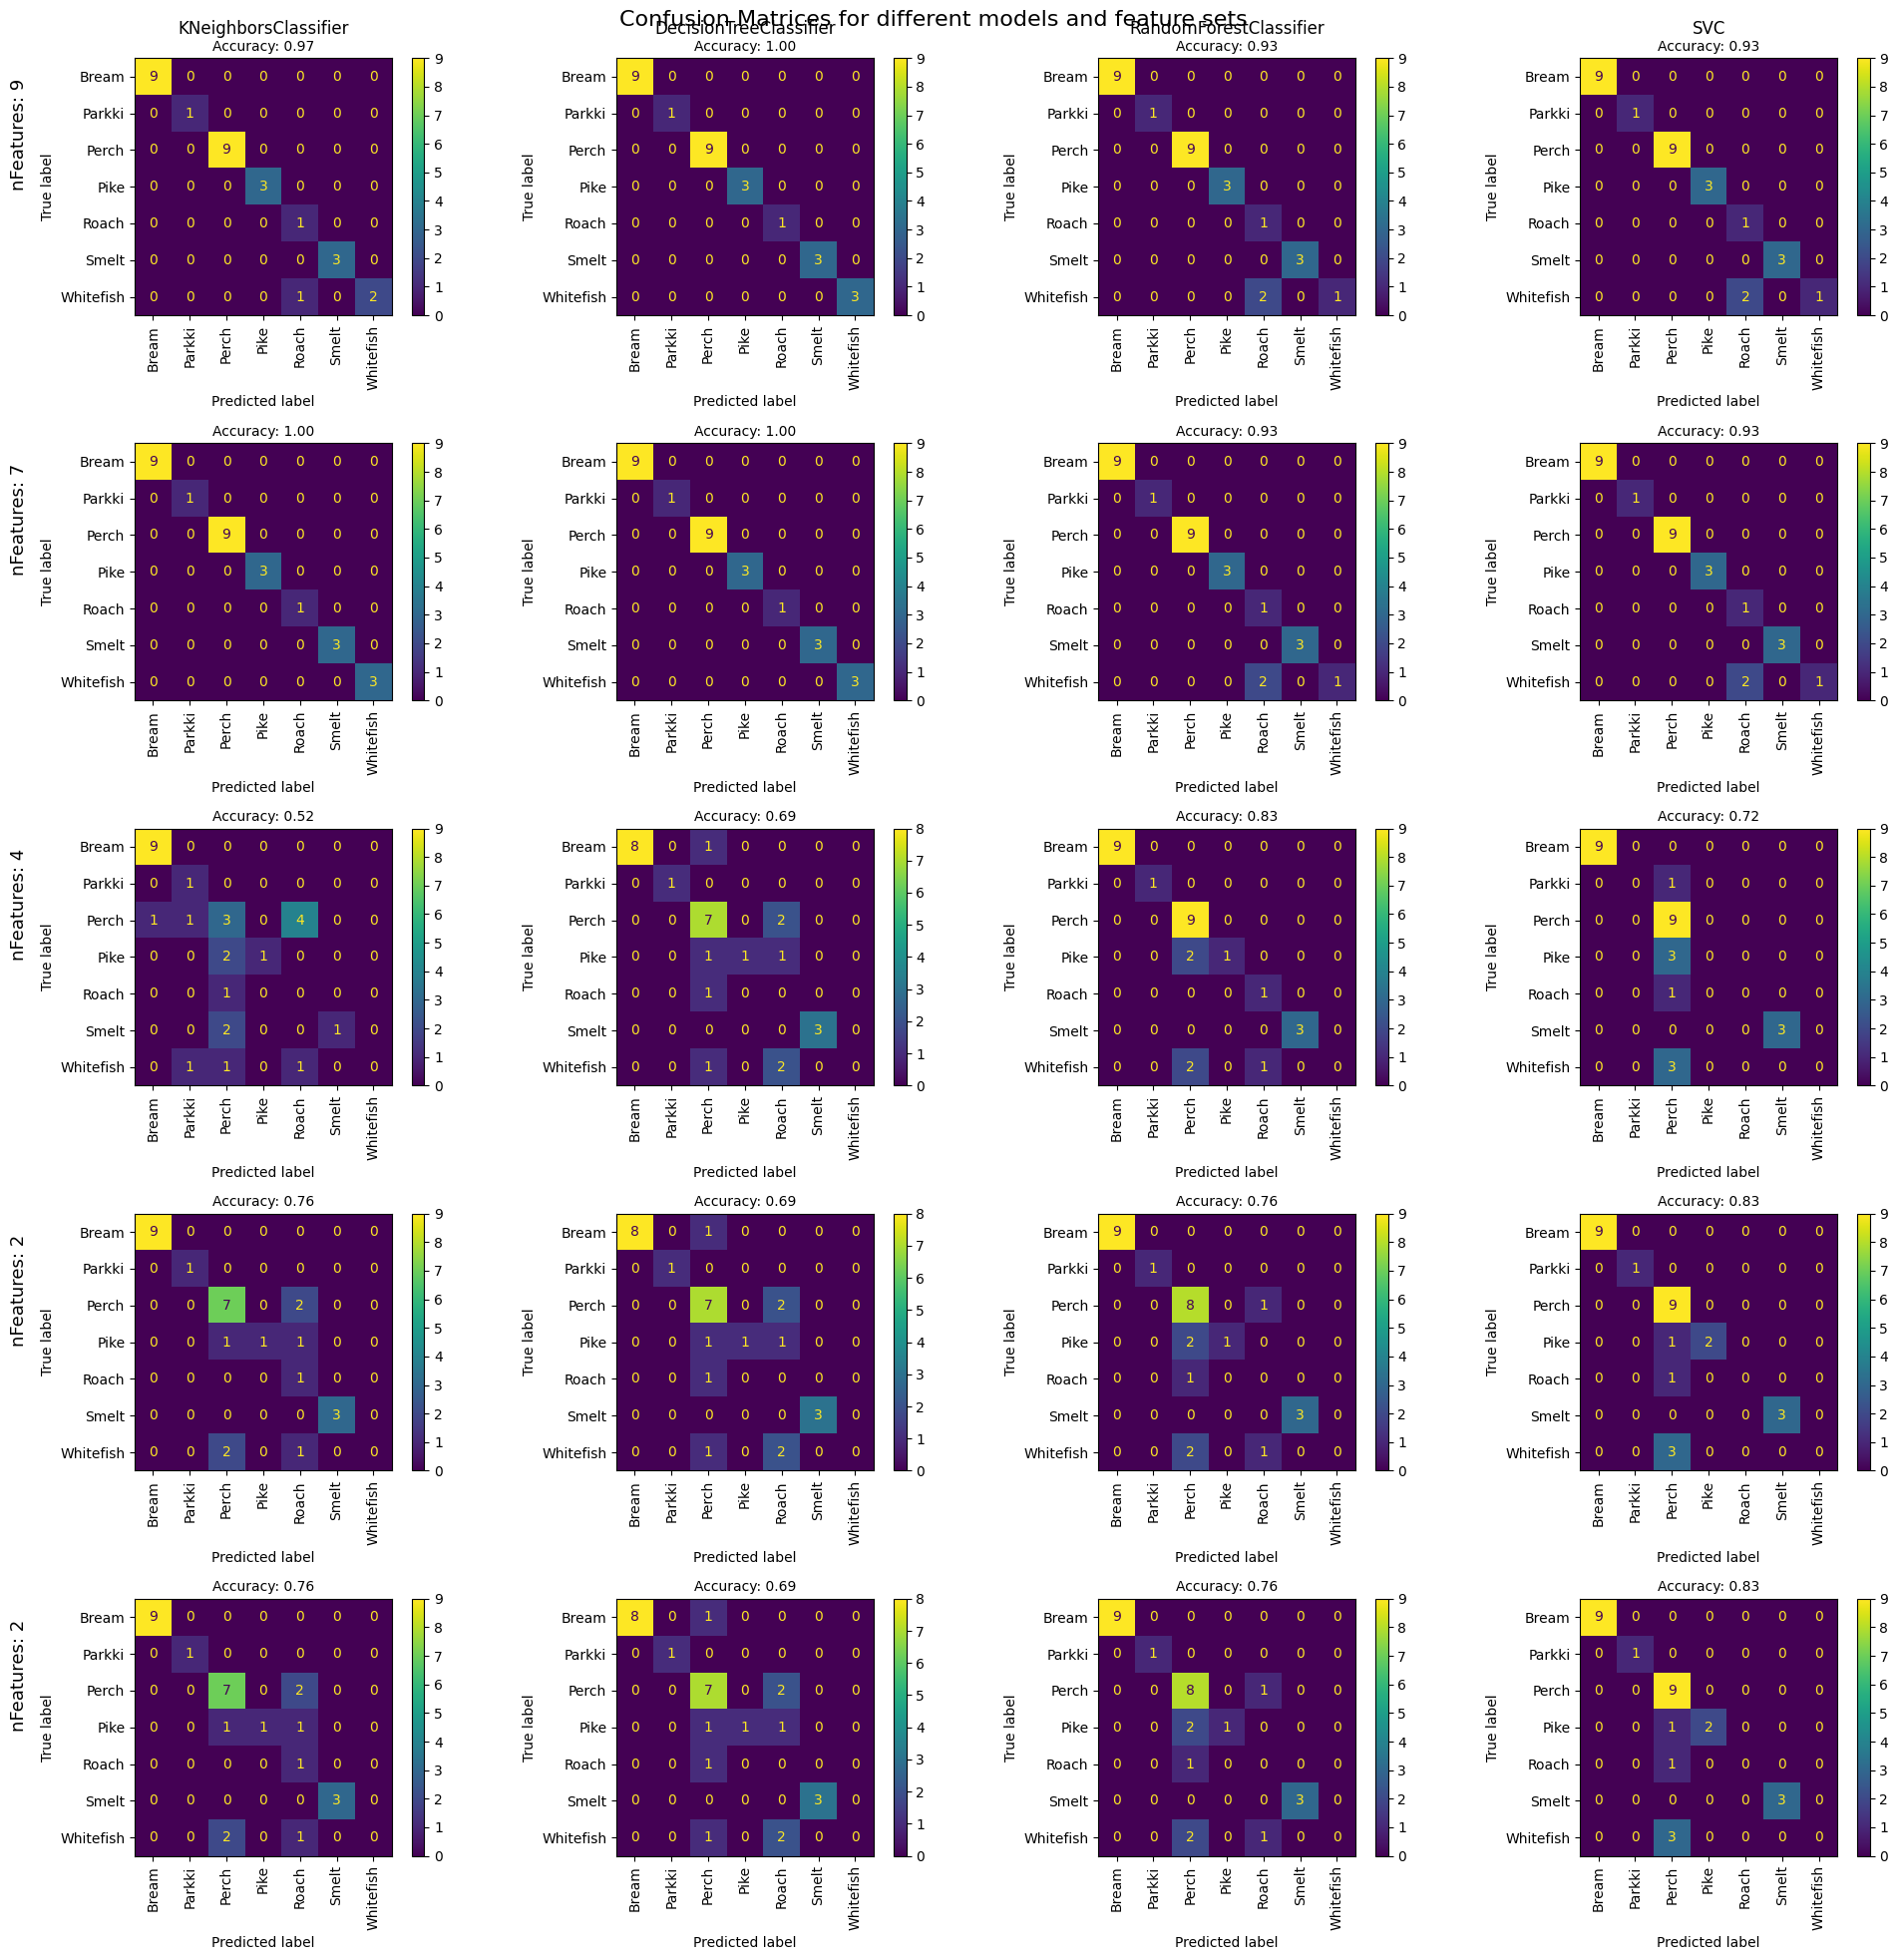

In [7]:
import matplotlib.pyplot as plt

X_list = []
y = df['Species']


X_list.append(df.drop(['Species'],axis=1))
X_list.append(df.drop(['noise1','noise2','Species'],axis=1))
X_list.append(df[['Weight','Height','noise1','noise2']])
X_list.append(df[['Weight','Height']])

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

Model_list = [ KNeighborsClassifier(n_neighbors=1),tree.DecisionTreeClassifier(random_state=42),RandomForestClassifier(max_depth=6,random_state=42),svm.SVC(random_state=42)]
acc_list = []

fig, axis = plt.subplots(len(X_list), len(Model_list), figsize=(20, 20))

plt.suptitle('Confusion Matrices for different models and feature sets', fontsize=16)

for i, model in enumerate(Model_list):
    print ('\n\nModel is :',model)
    acc_l = []
    for j, X in enumerate(X_list):
        print ('\nFeatures are :',X.columns.tolist())

        

            # plt.ylabel(f'Features: {X.columns.tolist()}', fontsize=10)
        
        acc_l.append(test_model(model,X,y,axis[j, i]))

        plt.sca(axis[j, i])
        if j==0:
            plt.title(f'{type(model).__name__}',y=1.06)
            
        if i==0:
            # axis[j, i].set_ylabel(f'Features: {X.columns.tolist()}', fontsize=10)
            plt.text(s=f'nFeatures: {len(X.columns)}',y=0.5, fontsize=13,x=-0.45, ha='center',transform=axis[j, i].transAxes,rotation=90)
        plt.text(s=f'Accuracy: {acc_l[-1]:.2f}',y=1.03, fontsize=10,x=0.5, ha='center',transform=axis[j, i].transAxes)
        plt.tick_params(axis='x', labelrotation=90)


    acc_list.append(acc_l)
plt.tight_layout()





In [8]:
for i, model in enumerate(Model_list):
    max_val = max(acc_list[i])
    max_idx = acc_list[i].index(max_val)
    print (f'Model {type(model).__name__} achieves max accuracy of {max_val} with feature set {max_idx}')

max_val = max(acc_list)

Model KNeighborsClassifier achieves max accuracy of 1.0 with feature set 1
Model DecisionTreeClassifier achieves max accuracy of 1.0 with feature set 0
Model RandomForestClassifier achieves max accuracy of 0.9310344827586207 with feature set 0
Model SVC achieves max accuracy of 0.9310344827586207 with feature set 0


# From the results we can conclude:
More features that are relaited to the subject increase the accuracy

Random information almoost always decreases the accuracy

With enouch features the effectiveness of the noice will ve reduced

random forrest seems to preform bether with noice